<a href="https://colab.research.google.com/github/Yuliana1453/Real-estate-predictive/blob/main/Predictive_analytics_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏘️ Real Estate Price Prediction
- **Nama:** Yuliana
- **Email:** yulianayuls24@gmail.com
- **ID Dicoding:** MC224D5X1784

## **1. Domain Proyek**

Pasar properti merupakan salah satu sektor ekonomi yang krusial, terutama dalam pengambilan keputusan investasi dan kebijakan. Prediksi harga rumah secara akurat sangat penting bagi agen properti, pembeli rumah, dan pengembang.

Dalam proyek ini, akan dilakukan analisis dan prediksi harga rumah berdasarkan fitur seperti luas area, jumlah kamar tidur, dan lokasi properti.

## **2. Business Understanding**
### 2.1 Problem Statement
Harga rumah sangat dipengaruhi oleh banyak faktor, seperti lokasi, aksesibilitas, tingkat kriminalitas, dan kondisi lingkungan. Mengetahui faktor-faktor ini dapat membantu pemangku kebijakan, investor, atau calon pembeli untuk mengambil keputusan yang lebih baik.

Masalah: Bagaimana memprediksi harga rumah di daerah Boston berdasarkan faktor lingkungan dan sosial ekonomi?

### 2.2 Goals
Membuat model prediktif untuk memperkirakan harga rumah (MEDV) berdasarkan fitur-fitur seperti tingkat kriminalitas (CRIM), akses jalan (RAD), kualitas pendidikan (PTRATIO), dan lainnya.

### 2.3 Solution statement
Solusi yang diusulkan:
- Baseline Model: Menggunakan Linear Regression sebagai baseline.
- Model Alternatif: Menggunakan Random Forest Regressor dan Gradient Boosting Regressor.
- Improvement: Melakukan hyperparameter tuning pada model terbaik menggunakan GridSearchCV.
- Evaluasi: Menggunakan metrik evaluasi seperti MAE, RMSE, dan R² score.

## **3. Data Understanding**

Dataset yang digunakan berasal dari Kaggle: [Real Estate Price](https://www.kaggle.com/code/fahadrehman07/real-estate-price-prediction?select=data.csv)
- Kolom/Fitur:
  - `CRIM`:	Tingkat kriminalitas per kapita
  - `ZN`	Proporsi lahan zonasi untuk rumah besar
  - `INDUS`	Proporsi area bisnis non-ritel
  - `CHAS`	Apakah berbatasan dengan Sungai Charles
  - `NOX`	Konsentrasi polutan NOx
  - `RM`:	Rata-rata jumlah kamar
  - `AGE`:	Persentase rumah yang dibangun sebelum 1940
  - `DIS`:	Jarak ke pusat pekerjaan di Boston
  - `RAD`:	Akses ke jalan utama
  - `TAX`:	Tarif pajak properti
  - `PTRATIO`:	Rasio siswa-guru
  - `B`:	Transformasi dari proporsi penduduk kulit hitam
  - `LSTAT`:	Persentase penduduk berstatus ekonomi rendah
  - `MEDV`:	Harga rumah median (target)

##4.Import Semua Packages/Library yang Digunakan

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

## 5.Data Wrangling

### Gathering Data

In [3]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yuliana1453","key":"922ded906b70e997e0d6db25055c4c48"}'}

In [4]:
# Setup Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset dari Kaggle
!kaggle datasets download -d arslanali4343/real-estate-dataset

# Ekstrak file zip
!unzip -o real-estate-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset
License(s): other
  0% 0.00/11.7k [00:00<?, ?B/s]
100% 11.7k/11.7k [00:00<00:00, 48.8MB/s]
Archive:  real-estate-dataset.zip
  inflating: data.csv                


In [5]:
df = pd.read_csv("data.csv")
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Assessing Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [7]:
# Cek missing value
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,5
AGE,0
DIS,0
RAD,0
TAX,0


In [8]:
# Cek duplikat
df.duplicated().sum()

np.int64(0)

**Insight:**
- Data mempunyai 14 kolom dan 511 baris.
- Data mempunya 5 missing value pada fitur `RM`.
- Data tidak memiliki duplikat.

### Data Cleaning

In [9]:
# Rename kolom agar lebih mudah dipahami
df.rename(columns={
    'CRIM': 'Tingkat_Kriminalitas',
    'ZN': 'Zona_Residen',
    'INDUS': 'Luas_Bisnis_Non_Ritel',
    'CHAS': 'Dekat_Sungai_Charles',
    'NOX': 'Konsentrasi_NOx',
    'RM': 'Rata2_Jumlah_Kamar',
    'AGE': 'Persentase_Rumah_Tua',
    'DIS': 'Jarak_ke_Pusat_Kerja',
    'RAD': 'Akses_Jalan_Radial',
    'TAX': 'Tingkat_Pajak_Properti',
    'PTRATIO': 'Rasio_Murid_Guru',
    'B': 'Indeks_Populasi_Kulit_Hitam',
    'LSTAT': 'Persen_Status_Rendah',
    'MEDV': 'Harga_Median_Rumah'
}, inplace=True)

In [10]:
# Imputasi missing value dengan rata-rata
mean_rm = df['Rata2_Jumlah_Kamar'].mean()
df['Rata2_Jumlah_Kamar'].fillna(mean_rm, inplace=True)


<ipython-input-10-67acb2f2e59c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rata2_Jumlah_Kamar'].fillna(mean_rm, inplace=True)


**Insight:**

Ditemukan beberapa outlier pada fitur seperti `Tingkat_Kriminalitas`, `Persen_Status_Rendah`, dan `Tingkat_Pajak_Properti`. Namun, outlier dianggap sebagai variasi alami dalam data properti di Boston, sehingga tidak dihapus agar model dapat mempelajari seluruh pola.

## 6.Exploratory Data Analysis (EDA)

In [12]:
#Cek ringkasan statistik data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tingkat_Kriminalitas,511.0,3.584139,8.564433,0.00632,0.082325,0.26169,3.621175,88.9762
Zona_Residen,511.0,11.252446,23.234838,0.00000,0.000000,0.00000,12.500000,100.0000
Luas_Bisnis_Non_Ritel,511.0,11.151096,6.828175,0.46000,5.190000,9.69000,18.100000,27.7400
Dekat_Sungai_Charles,511.0,0.068493,0.252838,0.00000,0.000000,0.00000,0.000000,1.0000
Konsentrasi_NOx,511.0,0.554757,0.115310,0.38500,0.449000,0.53800,0.624000,0.8710
Rata2_Jumlah_Kamar,511.0,6.287589,0.700343,3.56100,5.887500,6.21100,6.627000,8.7800
Persentase_Rumah_Tua,511.0,68.616243,28.099130,2.90000,45.050000,77.30000,94.050000,100.0000
Jarak_ke_Pusat_Kerja,511.0,3.783876,2.098631,1.12960,2.100350,3.15230,5.118000,12.1265
Akses_Jalan_Radial,511.0,9.485323,8.688469,1.00000,4.000000,5.00000,24.000000,24.0000
Tingkat_Pajak_Properti,511.0,407.440313,167.903532,187.00000,279.500000,330.00000,666.000000,711.0000


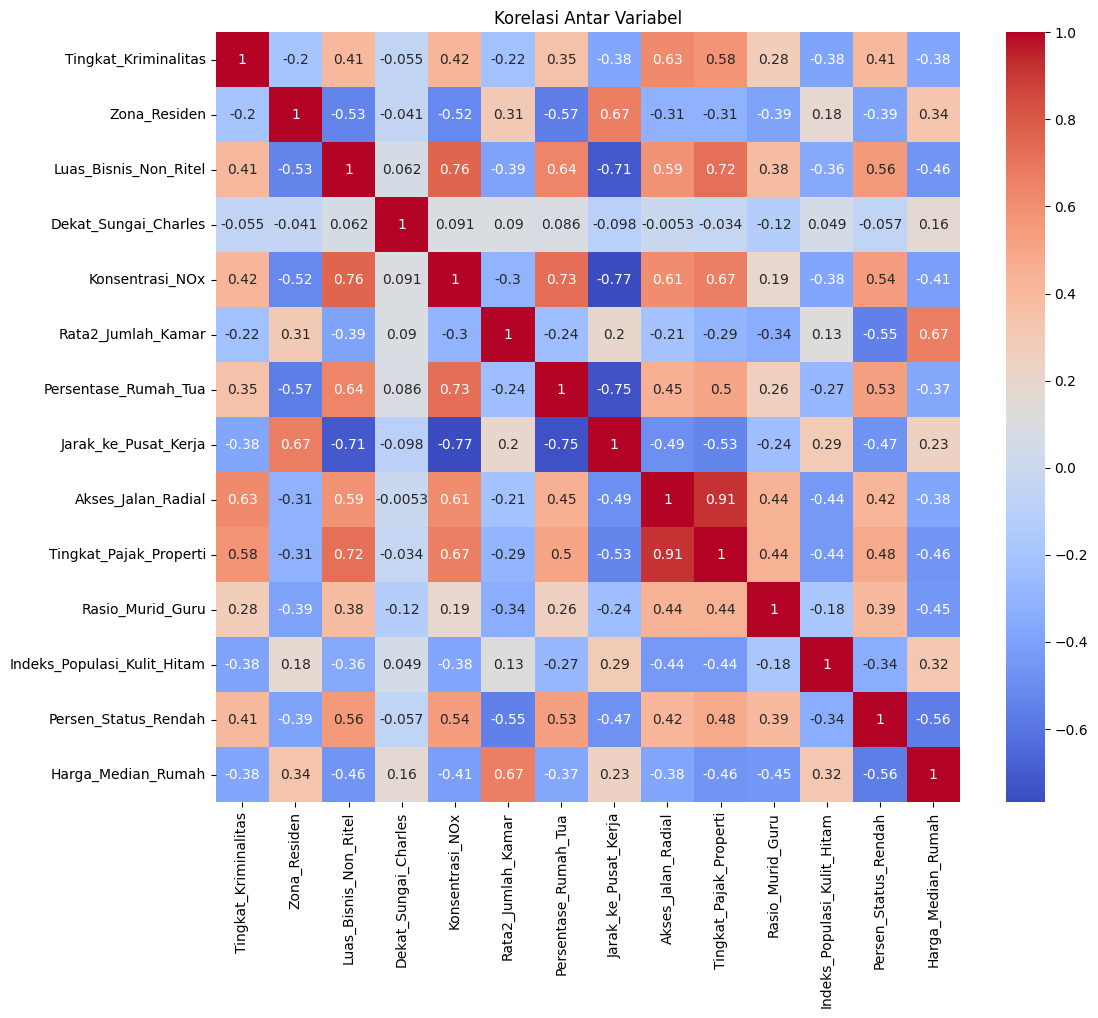

In [13]:
# Korelasi Fitur dengan Target (Harga_Median_Rumah)
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel')
plt.show()

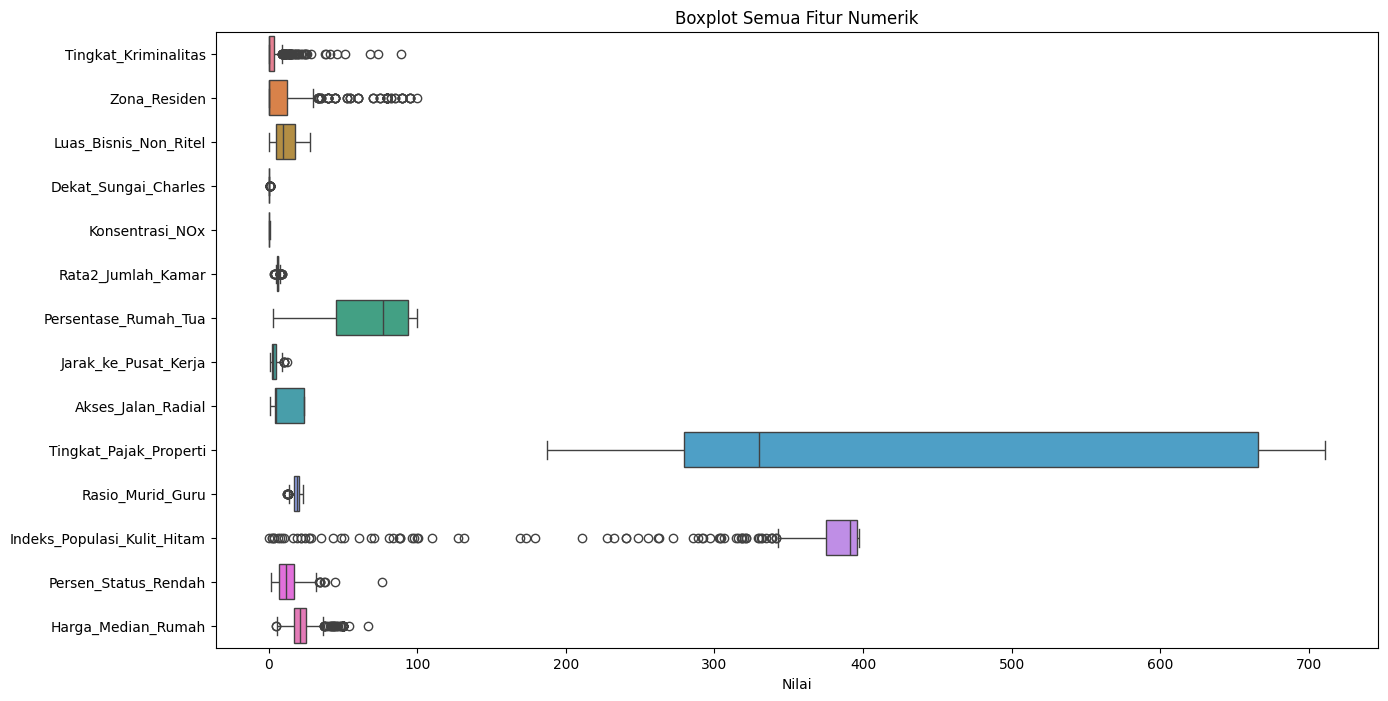

In [11]:
# Visualisasi boxplot semua fitur numerik
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include='number'), orient='h')
plt.title('Boxplot Semua Fitur Numerik')
plt.xlabel('Nilai')
plt.show()

**Outliers**

- Beberapa fitur, seperti Tingkat Kriminalitas, Persen Status Rendah, dan Tingkat Pajak Properti, memiliki banyak outlier.
- Meski demikian, perlu analisis lebih lanjut untuk memutuskan apakah outlier perlu dihapus atau tetap dipertahankan, tergantung apakah outlier ini merupakan data valid atau kesalahan data.

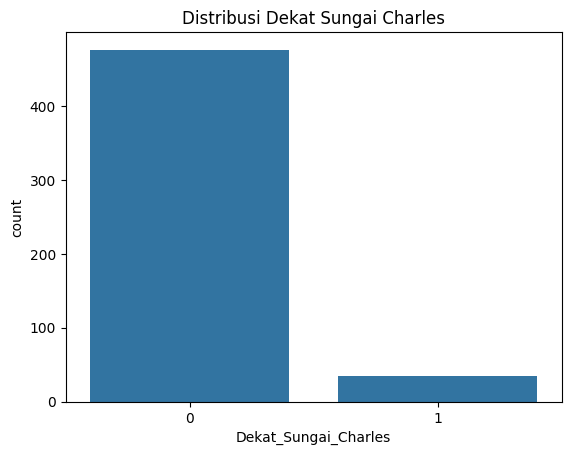

In [16]:
# Distribusi Fitur Kategorikal
sns.countplot(x='Dekat_Sungai_Charles', data=df)
plt.title('Distribusi Dekat Sungai Charles')
plt.show()

**📊 Dekat Sungai Charles (`Dekat_Sungai_Charles`):**

- Mayoritas properti tidak berada di dekat sungai (hanya sebagian kecil yang dekat sungai).
- Properti yang dekat sungai berpotensi memiliki harga yang lebih tinggi karena lokasi yang lebih menarik.

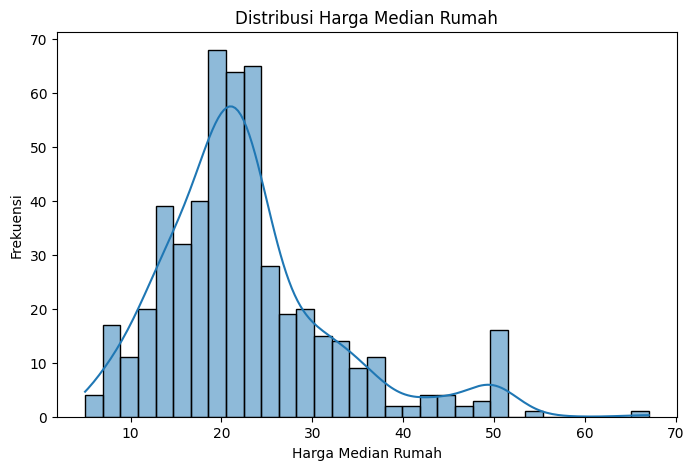

In [14]:
# Distribusi Target (Harga_Median_Rumah)
plt.figure(figsize=(8,5))
sns.histplot(df['Harga_Median_Rumah'], kde=True)
plt.title('Distribusi Harga Median Rumah')
plt.xlabel('Harga Median Rumah')
plt.ylabel('Frekuensi')
plt.show()

**📊Distribusi Harga Median Rumah (Target Variable)**

- Distribusi `Harga_Median_Rumah` menunjukkan pola right-skewed (condong ke kanan).

- Kebanyakan rumah memiliki harga antara 15 hingga 25, dengan sebagian kecil rumah yang sangat mahal (outlier di atas 50).

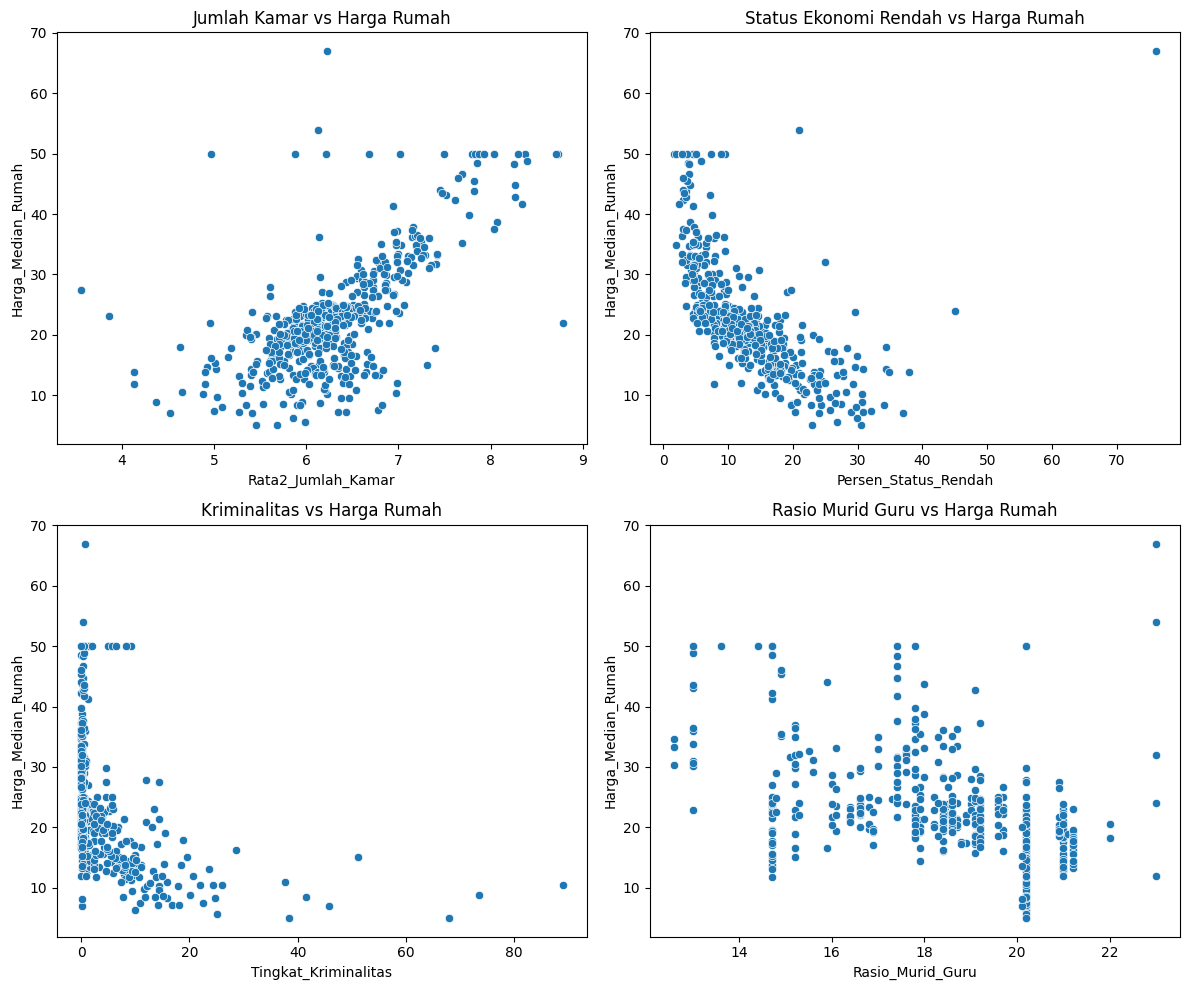

In [15]:
# Scatter Plot Fitur Utama vs Target
fig, axs = plt.subplots(2, 2, figsize=(12,10))

sns.scatterplot(x='Rata2_Jumlah_Kamar', y='Harga_Median_Rumah', data=df, ax=axs[0,0])
axs[0,0].set_title('Jumlah Kamar vs Harga Rumah')

sns.scatterplot(x='Persen_Status_Rendah', y='Harga_Median_Rumah', data=df, ax=axs[0,1])
axs[0,1].set_title('Status Ekonomi Rendah vs Harga Rumah')

sns.scatterplot(x='Tingkat_Kriminalitas', y='Harga_Median_Rumah', data=df, ax=axs[1,0])
axs[1,0].set_title('Kriminalitas vs Harga Rumah')

sns.scatterplot(x='Rasio_Murid_Guru', y='Harga_Median_Rumah', data=df, ax=axs[1,1])
axs[1,1].set_title('Rasio Murid Guru vs Harga Rumah')

plt.tight_layout()
plt.show()

**📊 Hubungan antara Fitur dan Harga Rumah**
- Jumlah Kamar (`Rata2_Jumlah_Kamar`) memiliki korelasi positif dengan harga rumah:
  - Semakin banyak kamar rata-rata, semakin tinggi harga rumah. Ini logis karena rumah yang lebih besar (lebih banyak kamar) cenderung lebih mahal.

- Persen Status Rendah (`Persen_Status_Rendah`) menunjukkan korelasi negatif dengan harga rumah:
  - Semakin tinggi proporsi penduduk dengan status ekonomi rendah, semakin rendah harga rumah. Ini mencerminkan nilai properti di area dengan tingkat kesejahteraan rendah.

- Tingkat Kriminalitas (`Tingkat_Kriminalitas`) juga memiliki korelasi negatif:
  - Semakin tinggi tingkat kriminalitas, semakin rendah harga rumah.

- Rasio Murid-Guru (`Rasio_Murid_Guru`) menunjukkan adanya pola negatif, meskipun sebaran datanya cukup tersebar.
  - Sekolah dengan rasio murid-guru tinggi cenderung berlokasi di area dengan harga rumah lebih rendah.

## 7.Data Preparation

### Split Data (Train-Test)

In [17]:
# Pisahkan data fitur (X) dan target (y)
X = df.drop(columns=['Harga_Median_Rumah'])
y = df['Harga_Median_Rumah']

# Bagi data: 80% train, 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Ukuran data train:", X_train.shape)
print("Ukuran data test:", X_test.shape)

Ukuran data train: (408, 13)
Ukuran data test: (103, 13)


### Scaling (StandardScaler)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 8.Modelling

### Linear Regression (Baseline Model)

In [21]:
# Inisialisasi model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Prediksi
y_pred_lr = lr.predict(X_test_scaled)

# Evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}')

Linear Regression - MAE: 4.14, RMSE: 8.44, R²: 0.17


### Random Forest Regressor

In [22]:
# Inisialisasi model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

# Prediksi
y_pred_rf = rf.predict(X_test_scaled)

# Evaluasi
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}')

Random Forest - MAE: 2.83, RMSE: 5.36, R²: 0.66


### Gradient Boosting Regressor

In [23]:
# Inisialisasi model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled, y_train)

# Prediksi
y_pred_gbr = gbr.predict(X_test_scaled)

# Evaluasi
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting - MAE: {mae_gbr:.2f}, RMSE: {rmse_gbr:.2f}, R²: {r2_gbr:.2f}')

Gradient Boosting - MAE: 2.70, RMSE: 4.85, R²: 0.73


### 📊 Perbandingan Hasil

In [24]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE': [mae_lr, mae_rf, mae_gbr],
    'RMSE': [rmse_lr, rmse_rf, rmse_gbr],
    'R2': [r2_lr, r2_rf, r2_gbr]
})

print(results)


               Model       MAE      RMSE        R2
0  Linear Regression  4.139068  8.438995  0.169032
1      Random Forest  2.834068  5.360982  0.664655
2  Gradient Boosting  2.699714  4.849867  0.725550


**📌 Insight:**
- Linear Regression:
  - Performa paling rendah, dengan nilai R² hanya 0.17, menunjukkan model ini kurang mampu menangkap pola hubungan kompleks antar fitur.

- Random Forest:
  - Jauh lebih baik, dengan MAE dan RMSE yang lebih rendah, serta R² sebesar 0.66. Artinya model ini dapat menangkap pola non-linear lebih baik.

- Gradient Boosting:
  - Model terbaik berdasarkan semua metrik. MAE dan RMSE paling kecil, dan R² tertinggi 0.73, menunjukkan model ini paling akurat dalam memprediksi harga rumah.


  ***Kesimpulan pemilihan model:***
  *Berdasarkan performa evaluasi, Gradient Boosting Regressor dipilih sebagai model terbaik karena memberikan nilai error paling rendah dan R² tertinggi.*

**Keunggulan Gradient Boosting:**

- Dapat menangani hubungan non-linear dengan baik.

- Lebih stabil terhadap data noisy.

**Kelemahan Gradient Boosting:**

- Waktu pelatihan lebih lama dibanding model lainnya.

- Rentan overfitting jika tidak dituning dengan baik.



### Hyperparameter Tuning (GridSearchCV)

In [27]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=gb_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print hasil
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Neg MSE):", grid_search.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (Neg MSE): -12.196783683701785


In [28]:
# Gunakan parameter terbaik dari GridSearchCV
best_gb = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_best = best_gb.predict(X_test)

# Evaluasi model terbaik
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"MAE: {mae_best:.4f}")
print(f"RMSE: {rmse_best:.4f}")
print(f"R²: {r2_best:.4f}")

MAE: 3.0019
RMSE: 5.9759
R²: 0.5833


**Insight:**

- R² turun dari 0.72 ke 0.58 → model jadi sedikit kurang baik setelah tuning.

- RMSE naik → ada overfitting/underfitting yang mungkin terjadi akibat parameter baru.

**Kesimpulan:** Gradient Boosting Default memberikan hasil lebih baik daripada hasil tuning pada data ini. Artinya, parameter default lebih optimal pada dataset ini.

## 9.Evaluasi Model

In [29]:
# Hasil prediksi dari masing-masing model
results = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Gradient Boosting (Tuned)'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_gbr),
        3.0019  # Hasil tuning yang kamu dapat
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_gbr)),
        5.9759  # Hasil tuning
    ],
    'R2': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gbr),
        0.5833  # Hasil tuning
    ]
}

# Buat dataframe hasil evaluasi
df_results = pd.DataFrame(results)
print(df_results)

                       Model       MAE      RMSE        R2
0          Linear Regression  4.139068  8.438995  0.169032
1              Random Forest  2.834068  5.360982  0.664655
2          Gradient Boosting  2.699714  4.849867  0.725550
3  Gradient Boosting (Tuned)  3.001900  5.975900  0.583300


## 10.Conclusion


1. **Linear Regression** menunjukkan performa paling rendah dengan MAE tertinggi (4.14) dan R² terendah (0.17), artinya model ini kurang mampu menjelaskan variansi data harga rumah.

2. **Random Forest** jauh lebih baik dengan MAE 2.83 dan R² 0.66, memperlihatkan model ini lebih stabil dan akurat dalam prediksi.

3. **Gradient Boosting** versi default memberikan performa terbaik dengan MAE 2.70 dan R² 0.73, yang berarti prediksi paling mendekati harga sebenarnya.

4. **Gradient Boosting setelah hyperparameter tuning** ternyata mengalami penurunan performa dibanding versi default (MAE naik jadi 3.00 dan R² turun ke 0.58). Hal ini bisa terjadi karena overfitting saat tuning atau parameter tuning belum optimal.

**Kesimpulan:**
**Model Gradient Boosting** versi default adalah pilihan terbaik untuk prediksi harga rumah di proyek ini. Untuk hyperparameter tuning, perlu eksplorasi lebih lanjut agar mendapatkan konfigurasi parameter yang benar-benar meningkatkan performa.